In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据
# 数据预处理
gld = pd.read_csv('GLD.csv')
gld['date'] = pd.to_datetime(gld['date'])
gld.set_index('date', inplace=True)
gld.tail()

,Close,High,Low,Open,Volume
date,,,,,
2025-05-05,306.880005,307.649994,304.679993,305.920013,8924000
2025-05-06,315.480011,315.619995,311.399994,313.119995,11445300
2025-05-07,310.750000,313.260010,310.079987,312.100006,7888300
2025-05-08,304.630005,310.480011,303.049988,309.760010,11927600
2025-05-09,306.839996,308.570007,306.010010,307.790009,6903700


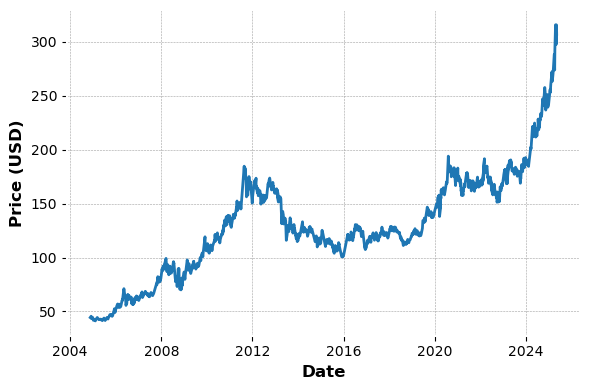

In [7]:
# 2. 绘制图形直观判断
plt.figure(figsize=(6,4))
plt.plot(gld['Close'])
# plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig('gld_close_price.pdf')


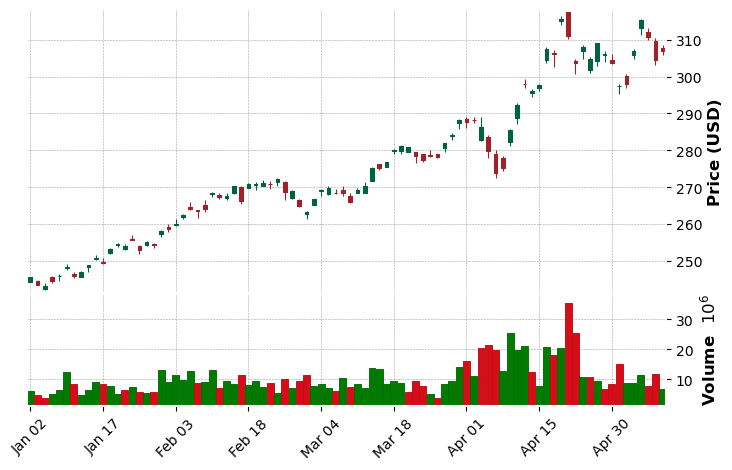

In [8]:
import mplfinance as mpf

# 准备数据，mplfinance需要有DatetimeIndex和特定的列名
gld_for_mpf = gld.copy()
gld_for_mpf.index.name = 'Date'  # mplfinance要求index为日期
gld_for_mpf = gld_for_mpf[['Open', 'High', 'Low', 'Close', 'Volume']]
gld_for_mpf = gld_for_mpf.loc[gld_for_mpf.index.year == 2025]
# 画蜡烛图
mpf.plotting.plot(
    gld_for_mpf,
    type='candle',
    style='charles',
    volume=True,
    # title='GLD Gold Price Candlestick Chart',
    ylabel='Price (USD)',
    figscale=0.8,  # Increase figure size for publication
    figratio=(8, 5),  # Typical paper aspect ratio
    tight_layout=True,
    # savefig=dict(fname='gld_candlestick_2024.png', dpi=300, pad_inches=0.25)
)